# Подготовка датасета

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

feature = 'Region'
size = 1000
train_ratio = 0.8

df = pd.read_csv('us_cities.csv')
df = df.dropna(ignore_index=True)
df[feature] = df[feature].map({'West': 0, 'Midwest': 0, 'Northeast': 1, 'South': 1})
df = df.iloc[:, 1:].drop(columns=['City', 'State', 'County', 'Division', 'Longitude', 'Latitude'])
for column in df:
    if column != 'Region':
        mean = df[column].mean()
        std = df[column].std()
        outliers = np.where((df[column] - mean) / std >= 3)[0]
        df = df.drop(index=outliers).reset_index(drop=True)

west_df = resample(df.loc[df[feature] == 0], n_samples=size).reset_index(drop=True)
east_df = resample(df.loc[df[feature] == 1], n_samples=size).reset_index(drop=True)
df = pd.concat([west_df, east_df])
target = pd.Series(df[feature])
df = df.drop(columns=[feature])
df = (df - df.mean()) / df.std()
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size=train_ratio)
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

# Зависимость качества от количества слоёв

In [ ]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1])
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train)) 
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test)) 

In [ ]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1])
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

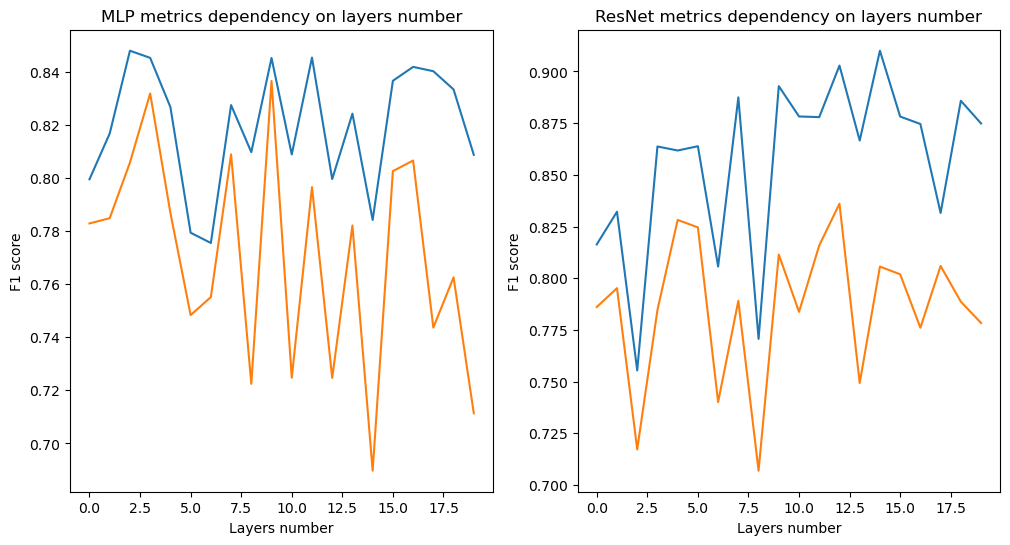

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# С Xavier инициализацией

In [2]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1], xavier=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

In [3]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1], xavier=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

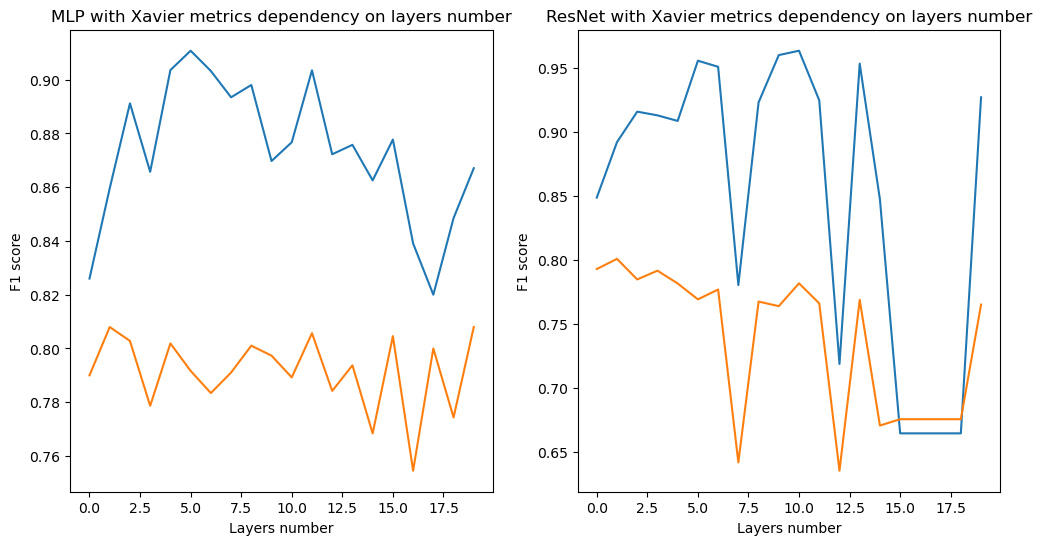

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP with Xavier metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet with Xavier metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# С batch нормализацией

In [2]:
from sklearn.metrics import f1_score
from deeplearning import MLPClassifier

layers = 20
mlp_train_scores = [0] * layers
mlp_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = MLPClassifier(i, X_train.shape[1], batch_norm=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    mlp_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    mlp_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

In [3]:
from deeplearning import ResNetClassifier

resnet_train_scores = [0] * layers
resnet_test_scores = [0] * layers
for i in range(1, layers + 1):
    classifier = ResNetClassifier(i, X_train.shape[1], batch_norm=True)
    classifier.fit(X_train, y_train, epochs=1000, lr=0.1)
    resnet_train_scores[i - 1] = f1_score(y_train, classifier.predict(X_train))
    resnet_test_scores[i - 1] = f1_score(y_test, classifier.predict(X_test))

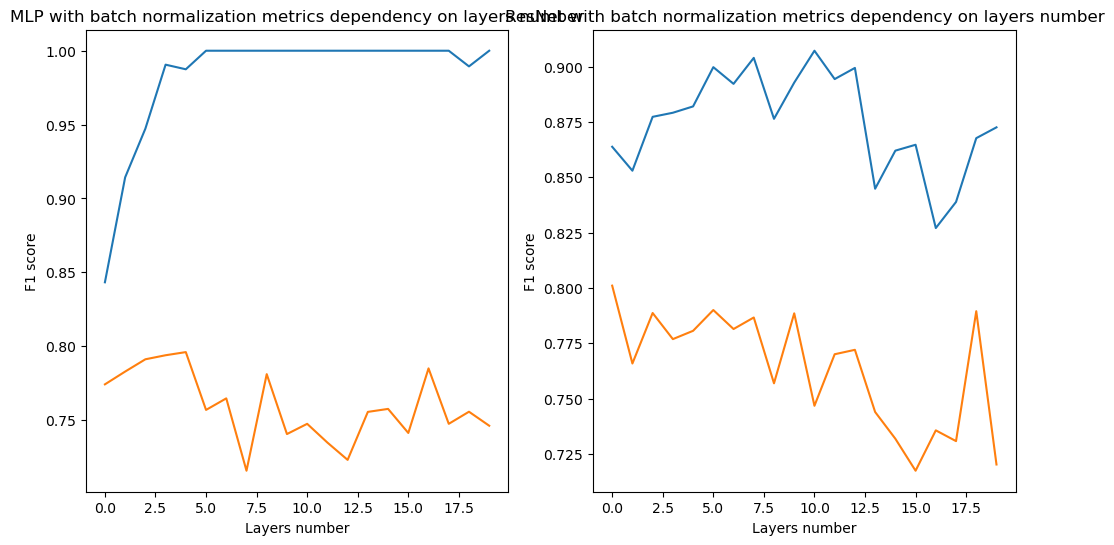

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('MLP with batch normalization metrics dependency on layers number')
ax[0].set_xlabel('Layers number')
ax[0].set_ylabel('F1 score')
ax[0].plot(mlp_train_scores, label='Train')
ax[0].plot(mlp_test_scores, label='Test')

ax[1].set_title('ResNet with batch normalization metrics dependency on layers number')
ax[1].set_xlabel('Layers number')
ax[1].set_ylabel('F1 score')
ax[1].plot(resnet_train_scores, label='Train')
ax[1].plot(resnet_test_scores, label='Test')

# Прореживание ResNet

In [2]:
from deeplearning import ResNetClassifier

X_first, X_second, y_first, y_second = train_test_split(X_train, y_train, train_size=0.5)
resnet = ResNetClassifier(50, X_first.shape[1])
resnet.fit(X_first, y_first, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)
good_blocks = resnet.model.cut(X_first)

In [3]:
usual_resnet = ResNetClassifier(50, X_train.shape[1])
usual_resnet.fit(X_train, y_train, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)

In [4]:
new_resnet = ResNetClassifier(50, X_first.shape[1], blocks=good_blocks)
new_resnet.fit(X_second, y_second, epochs=1000, lr=0.1, X_test=X_test, y_test=y_test)

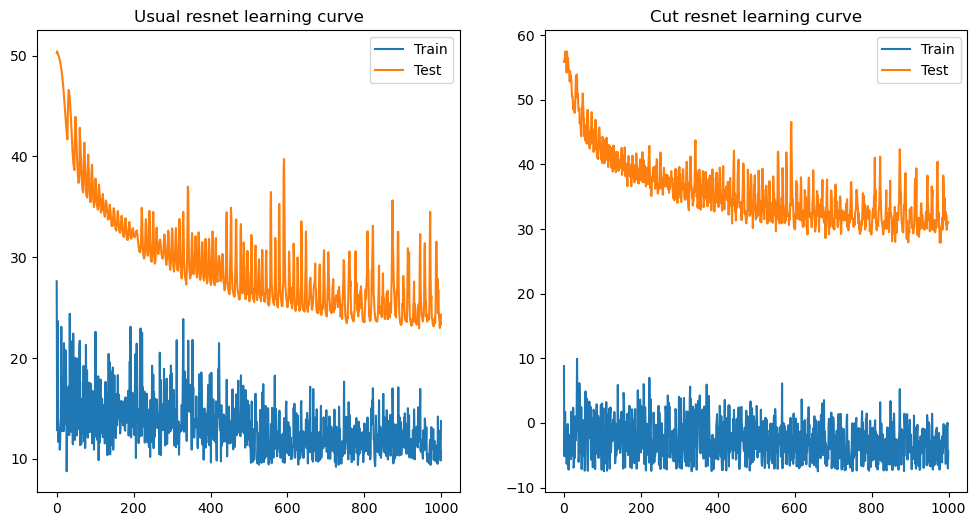

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Usual resnet learning curve')
ax[0].plot(usual_resnet.train_history, label='Train')
ax[0].plot(usual_resnet.test_history, label='Test')
ax[0].legend()
ax[1].set_title('Cut resnet learning curve')
ax[1].plot(new_resnet.train_history, label='Train')
ax[1].plot(new_resnet.test_history, label='Test')
ax[1].legend()